In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("C:/Users/nikhi/Downloads/Time_series_analysis_and_forecast_DATASET.csv")

In [33]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [34]:
df.tail()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000
92015,2021-02-28 23:00:00,24.3,714.69630,5.4848,62.955


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [36]:
# Converting FullDate column into DateTime
df.FullDate = pd.to_datetime(df["FullDate"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [38]:
data_copy = df.copy()

In [39]:
# Question 11
# Create a datetime index inorder to use resample
data_copy.set_index('FullDate',inplace= True)

#resample by day
new_df = data_copy.resample('D').sum()

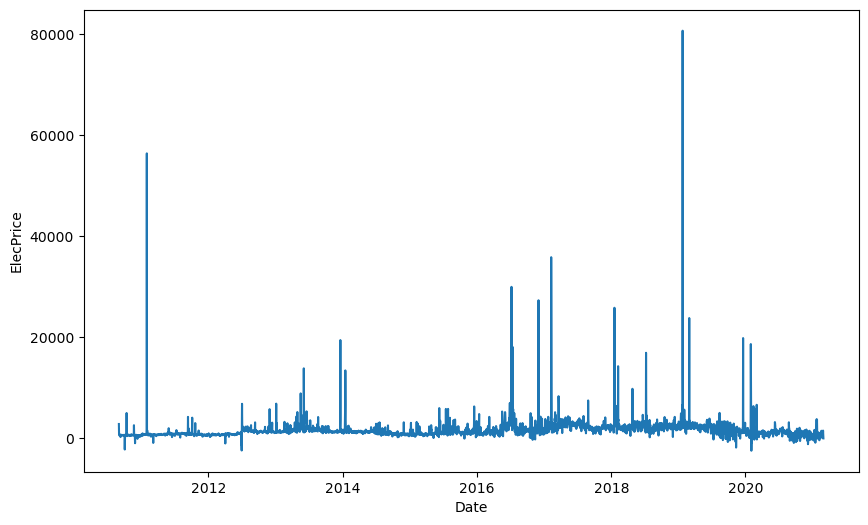

In [40]:
plt.figure(figsize = (10,6))
plt.plot(new_df.index, new_df.ElecPrice)
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
# Question 12
result1 = adfuller(new_df['SysLoad'])
print("p-value of Sysload")
print(round(result1[1],6))

p-value of Sysload
0.004254


In [43]:
result2 = adfuller(new_df['GasPrice'])
print("p-value of GasPrice")
print(round(result2[1],6))

p-value of GasPrice
0.045027


In [44]:
# Question 13 
for key, value in result2[4].items():
    print('Critial Values:')
    print(key , round(value,4)) 

Critial Values:
1% -3.4321
Critial Values:
5% -2.8623
Critial Values:
10% -2.5672


In [45]:
result3 = adfuller(new_df['ElecPrice'])
for key, value in result3[4].items():
    print('Critial Values:')
    print(key , round(value,4)) 

Critial Values:
1% -3.4321
Critial Values:
5% -2.8623
Critial Values:
10% -2.5672


In [46]:
# Question 14-16
from prophet import Prophet

In [47]:
new_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [48]:
new_df.reset_index(inplace = True)

In [49]:
new_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [50]:
fp_df['ds'] = new_df.FullDate
fp_df['y'] = new_df.ElecPrice
fp_df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   3834 non-null   datetime64[ns]
 1   Tmax       3834 non-null   float64       
 2   SysLoad    3834 non-null   float64       
 3   GasPrice   3834 non-null   float64       
 4   ElecPrice  3834 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.9 KB


In [52]:
train =  fp_df[:2757]
test = fp_df[2757:]

In [53]:
# define the model
model = Prophet()
# fit the model
model.fit(train)

00:14:19 - cmdstanpy - INFO - Chain [1] start processing
00:14:19 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
pred = model.predict(test)

In [55]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2689.339501,77.591829,4866.621397,2689.339501,2689.339501,-155.544743,-155.544743,-155.544743,9.730924,9.730924,9.730924,-165.275667,-165.275667,-165.275667,0.0,0.0,0.0,2533.794758
1,2018-03-21,2690.146479,358.910135,5045.395807,2690.146479,2690.146479,-2.999529,-2.999529,-2.999529,159.371311,159.371311,159.371311,-162.370841,-162.370841,-162.370841,0.0,0.0,0.0,2687.146950
2,2018-03-22,2690.953457,395.905712,5077.444029,2690.953457,2690.953457,95.220809,95.220809,95.220809,257.123036,257.123036,257.123036,-161.902227,-161.902227,-161.902227,0.0,0.0,0.0,2786.174266
3,2018-03-23,2691.760435,178.271742,5084.093616,2691.760435,2691.760435,-113.426059,-113.426059,-113.426059,50.278212,50.278212,50.278212,-163.704271,-163.704271,-163.704271,0.0,0.0,0.0,2578.334376
4,2018-03-24,2692.567413,-127.436604,4678.347414,2692.567413,2692.567413,-438.985887,-438.985887,-438.985887,-271.450904,-271.450904,-271.450904,-167.534983,-167.534983,-167.534983,0.0,0.0,0.0,2253.581526


In [52]:
train =  fp_df[:2757]
test = fp_df[2757:]

In [53]:
# define the model
model = Prophet()
# fit the model
model.fit(train)

00:14:19 - cmdstanpy - INFO - Chain [1] start processing
00:14:19 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
pred = model.predict(test)

In [55]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2689.339501,77.591829,4866.621397,2689.339501,2689.339501,-155.544743,-155.544743,-155.544743,9.730924,9.730924,9.730924,-165.275667,-165.275667,-165.275667,0.0,0.0,0.0,2533.794758
1,2018-03-21,2690.146479,358.910135,5045.395807,2690.146479,2690.146479,-2.999529,-2.999529,-2.999529,159.371311,159.371311,159.371311,-162.370841,-162.370841,-162.370841,0.0,0.0,0.0,2687.146950
2,2018-03-22,2690.953457,395.905712,5077.444029,2690.953457,2690.953457,95.220809,95.220809,95.220809,257.123036,257.123036,257.123036,-161.902227,-161.902227,-161.902227,0.0,0.0,0.0,2786.174266
3,2018-03-23,2691.760435,178.271742,5084.093616,2691.760435,2691.760435,-113.426059,-113.426059,-113.426059,50.278212,50.278212,50.278212,-163.704271,-163.704271,-163.704271,0.0,0.0,0.0,2578.334376
4,2018-03-24,2692.567413,-127.436604,4678.347414,2692.567413,2692.567413,-438.985887,-438.985887,-438.985887,-271.450904,-271.450904,-271.450904,-167.534983,-167.534983,-167.534983,0.0,0.0,0.0,2253.581526


In [56]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [57]:
y_true = test['y']
y_pred = pred['yhat']

In [58]:
MAPE = mean_absolute_percentage_error(y_true, y_pred) 

In [60]:
print(round(MAPE*100,2))

547.58


In [61]:
RMSE  = np.sqrt(mean_squared_error(y_true,y_pred))

In [62]:
print(round(RMSE,2))

3214.12


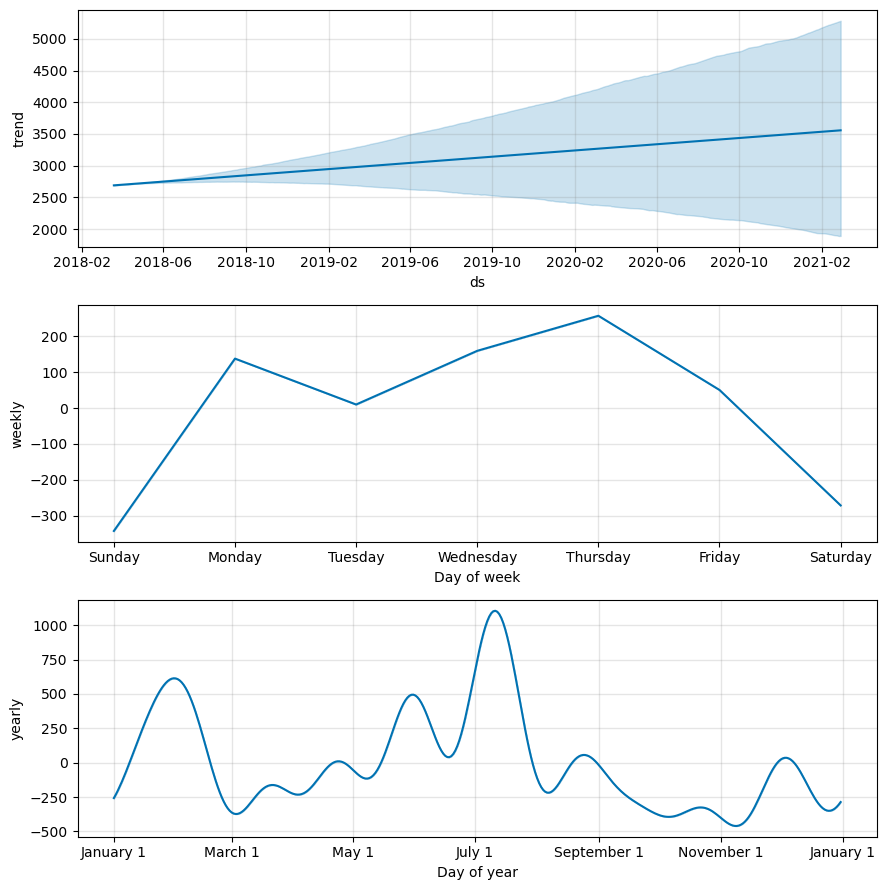

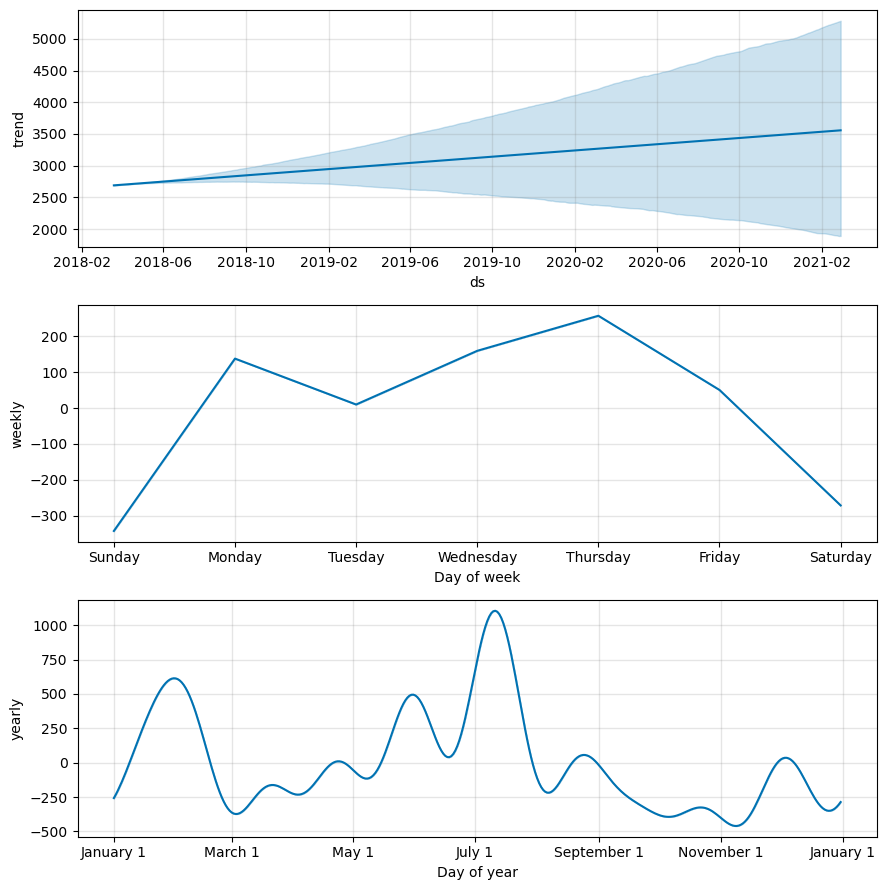

In [63]:
model.plot_components(pred)

In [65]:
fp_df['ds'] = new_df.FullDate
fp_df['y'] = new_df.ElecPrice
fp_df['add1'] = new_df.SysLoad
fp_df['add2'] = new_df.Tmax
fp_df['add3'] = new_df.GasPrice
fp_df.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [66]:
train =  fp_df[:2757]
test = fp_df[2757:]

In [67]:
# define the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
# fit the model
model.fit(train)

00:23:56 - cmdstanpy - INFO - Chain [1] start processing
00:23:56 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
pred = model.predict(test)

In [69]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1868.198143,-229.605689,4068.696234,1868.198143,1868.198143,-855.914291,-855.914291,-855.914291,0.233816,...,-84.445197,-84.445197,-84.445197,-38.849012,-38.849012,-38.849012,0.0,0.0,0.0,1989.463616
1,2018-03-21,1868.891427,-271.424826,4106.836284,1868.891427,1868.891427,-1025.835274,-1025.835274,-1025.835274,0.231042,...,42.503940,42.503940,42.503940,-29.533022,-29.533022,-29.533022,0.0,0.0,0.0,1980.945820
2,2018-03-22,1869.584710,675.491438,5075.593785,1869.584710,1869.584710,-214.842522,-214.842522,-214.842522,0.217600,...,145.667398,145.667398,145.667398,-24.472686,-24.472686,-24.472686,0.0,0.0,0.0,2900.842208
3,2018-03-23,1870.277994,278.088788,4845.684152,1870.277994,1870.277994,-274.748354,-274.748354,-274.748354,0.209705,...,-44.263518,-44.263518,-44.263518,-23.527073,-23.527073,-23.527073,0.0,0.0,0.0,2585.062730
4,2018-03-24,1870.971277,-826.518355,3726.261645,1870.971277,1870.971277,-1075.853400,-1075.853400,-1075.853400,0.207785,...,-117.597806,-117.597806,-117.597806,-26.445853,-26.445853,-26.445853,0.0,0.0,0.0,1438.276935


In [70]:
y_true = test['y']
y_pred = pred['yhat']

In [71]:
MAPE = mean_absolute_percentage_error(y_true, y_pred) 

In [72]:
print(round(MAPE*100,2))

232.98


In [73]:
RMSE  = np.sqrt(mean_squared_error(y_true,y_pred))

In [74]:
print(round(RMSE,2))

2708.81


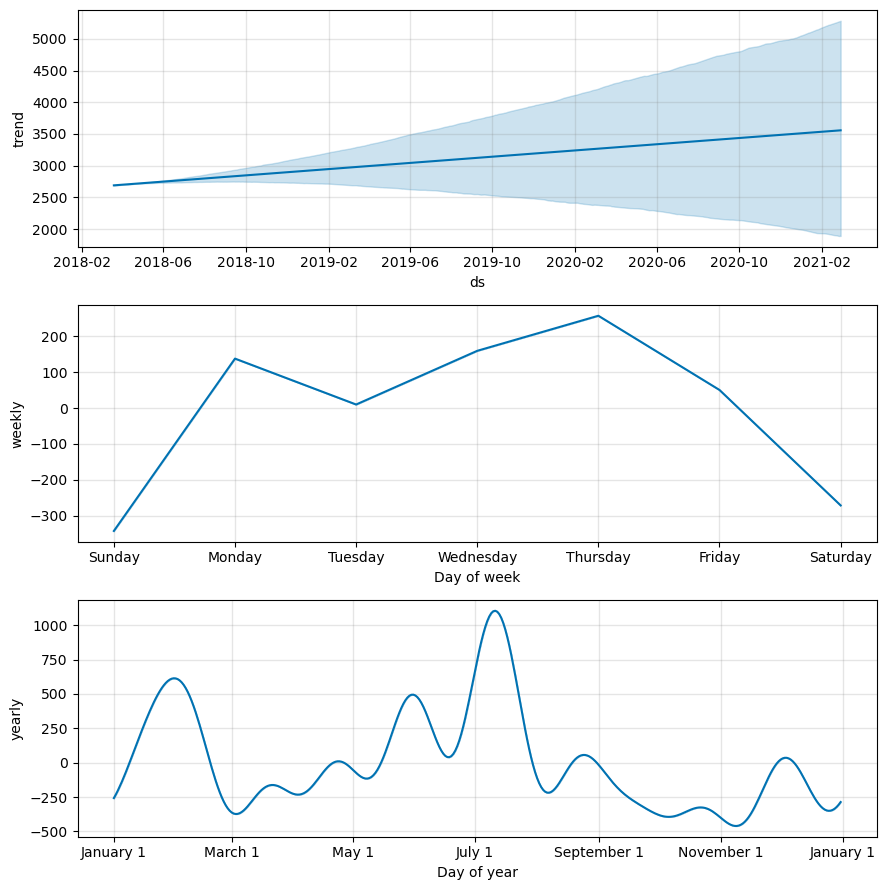

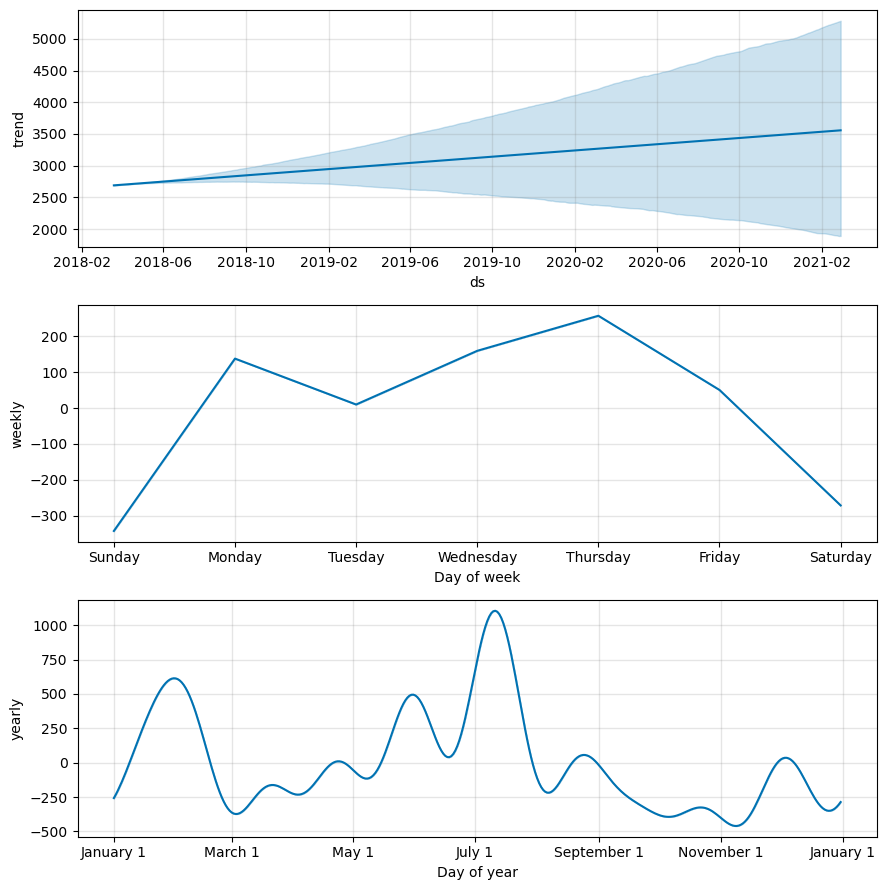

In [63]:
model.plot_components(pred)

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [76]:
fp_df['ds'] = new_df.FullDate
fp_df['y'] = new_df.ElecPrice
fp_df['add1'] = new_df.SysLoad
fp_df['add2'] = new_df.GasPrice
fp_df.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,88.56,88.56
1,2010-09-02,570.810,38898.990,88.56,88.56
2,2010-09-03,504.975,41665.760,106.80,106.80
3,2010-09-04,502.275,35638.085,81.36,81.36
4,2010-09-05,500.555,35611.410,106.80,106.80


In [77]:
train =  fp_df[:2757]
test = fp_df[2757:]

In [78]:
# define the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
# fit the model
model.fit(train)

00:29:56 - cmdstanpy - INFO - Chain [1] start processing
00:29:56 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
pred = model.predict(test)

In [80]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1863.615891,-201.500906,4293.218648,1863.615891,1863.615891,-856.120022,-856.120022,-856.120022,1100.232771,...,-84.249898,-84.249898,-84.249898,-38.752777,-38.752777,-38.752777,0.0,0.0,0.0,1984.725966
1,2018-03-21,1864.298435,-229.182420,4307.340998,1864.298435,1864.298435,-1026.081848,-1026.081848,-1026.081848,1124.680157,...,42.719844,42.719844,42.719844,-29.494993,-29.494993,-29.494993,0.0,0.0,0.0,1976.121596
2,2018-03-22,1864.980979,669.128058,5055.005437,1864.980979,1864.980979,-214.894162,-214.894162,-214.894162,1124.680157,...,145.331106,145.331106,145.331106,-24.489307,-24.489307,-24.489307,0.0,0.0,0.0,2895.608772
3,2018-03-23,1865.663523,355.124573,4808.486654,1865.663523,1865.663523,-274.814394,-274.814394,-274.814394,1057.106879,...,-44.055842,-44.055842,-44.055842,-23.594204,-23.594204,-23.594204,0.0,0.0,0.0,2580.305962
4,2018-03-24,1866.346066,-863.391609,3481.119461,1866.346066,1866.346066,-1076.111997,-1076.111997,-1076.111997,786.989649,...,-117.866824,-117.866824,-117.866824,-26.558912,-26.558912,-26.558912,0.0,0.0,0.0,1432.797982


In [81]:
y_true = test['y']
y_pred = pred['yhat']

In [82]:
MAPE = mean_absolute_percentage_error(y_true, y_pred) 

In [83]:
print(round(MAPE*100,2))

230.51
